In [1]:
import time
import pandas as pd
from tqdm import tqdm
import langid
import langdetect
import polyglot
from polyglot.text import Text, Word
from polyglot.detect import Detector
import csv

In [2]:
def detection_langid(text):
    lingua = langid.classify(text)
    return lingua[0]

In [3]:
def lang_detect(text):
    lingua = langdetect.detect_langs(text)[0]
    lingua1 = lingua.lang
    return lingua1

In [4]:
def polyglot1(text):
    texto = Text(text)
    return texto.language.code

In [11]:
# Lendo o csv e pondo num dataframe
df = pd.read_csv('/dados/csv_processado.csv', header=None)
df.columns = ["Título", "Língua"]

In [13]:
# Criar uma lista só de título e outra para a língua
lista_titulo = df["Título"]
lista_lingua = df["Língua"]

In [20]:
# Usar o langit para classificar a língua da string e calcular o tempo gasto
tempo_langid = []
class_langid = []
for i in tqdm(range(len(lista_titulo))):
    start = time.time()
    lingua = detection_langid(lista_titulo[i])
    end = time.time()
    t = end - start
    tempo_langid.append(t)
    class_langid.append(lingua)

100%|██████████| 258/258 [00:00<00:00, 1098.31it/s]


In [15]:
# Usar o lang_detect para classificar a língua da string e calcular o tempo gasto
tempo_lang_detect = []
class_lang_detect = []
for i in tqdm(range(len(lista_titulo))):
    start = time.time()
    lingua = lang_detect(lista_titulo[i])
    end = time.time()
    t = end - start
    tempo_lang_detect.append(t)
    class_lang_detect.append(lingua)

100%|██████████| 258/258 [00:01<00:00, 244.38it/s]


In [16]:
# Usar o polyglot para classificar a língua da string e calcular o tempo gasto
tempo_polyglot = []
class_polyglot = []
for i in tqdm(range(len(lista_titulo))):
    start = time.time()
    lingua = polyglot1(lista_titulo[i])
    end = time.time()
    t = end - start
    tempo_polyglot.append(t)
    class_polyglot.append(lingua)

100%|██████████| 258/258 [00:00<00:00, 39437.68it/s]


In [17]:
# Agrupar todos os tempos num mesmo dataframe
df_tempo = pd.DataFrame(list(zip(lista_titulo, tempo_langid, tempo_lang_detect, tempo_polyglot)), 
               columns =['Título', 'langid', 'lang_detect', 'polyglot']) 

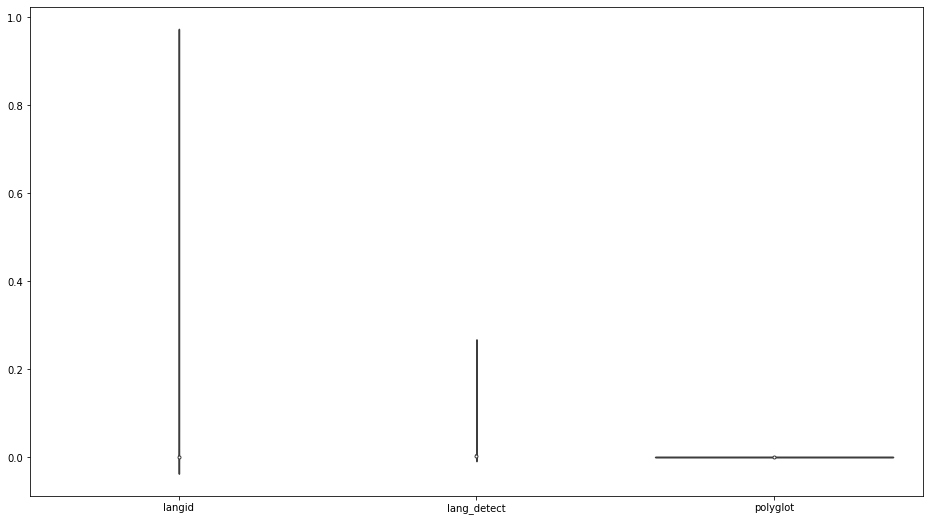

In [18]:
# Plotar a distribuição violino
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,9))
ax = sns.violinplot(data=df_tempo)

In [22]:
# Agrupar as informações de lingua em um mesmo csv
df_lingua = pd.DataFrame(list(zip(lista_titulo, lista_lingua, class_langid, class_lang_detect, class_polyglot)), 
               columns =['Título', 'Língua', 'langid', 'lang_detect', 'polyglot']) 

In [32]:
# Escrever csv com as línguas
export_csv = df_lingua.to_csv ('/dados/csv_linguas.csv', index = None, header=True)